In [11]:
from os import chdir as cd
import glob

pathin = '/Users/ethan/Documents/GitHub/CLA_2019/Coding/Friday Exercises/Data/Hall_MOTCHI/'

folders = ['Hall_CHI','Hall_MOT']

pro = []
work = []

cd(pathin + folders[1])
for file in glob.glob('*.txt'):
    with open(file,'r') as f:
        text = f.read()
        if 'Pro' in file:
            pro.append(text)
        if 'Work' in file:
            work.append(text)


tokens_pro = []
tokens_work = []
types_pro = []
types_work = []
TTR_pro = []
TTR_work = []

for transcript in pro:
    tokens = transcript.split()
    tokens_pro.append(len(tokens))
    types = set(transcript.split())
    types_pro.append(len(types))
    try:
        TTR_pro.append(len(types)/len(tokens))
    except:
        pass
    
for transcript in work:
    tokens = transcript.split()
    tokens_work.append(len(tokens))
    types = set(transcript.split())
    types_work.append(len(types))
    try:
        TTR_work.append(len(types)/len(tokens))
    except:
        pass

In [13]:
TTR_work

[0.2512984418697563,
 0.15100182149362476,
 0.3759512937595129,
 0.1492836676217765,
 0.18866141732283465,
 0.1903513371788149,
 0.2423060251408756,
 0.17258142926592124,
 0.21891989851395433,
 0.2245557350565428,
 0.15878503518952958,
 0.1752088507563784,
 0.15083922261484098,
 0.3681592039800995,
 0.34970238095238093,
 0.15869229689911604,
 0.1717933836331979]

In [15]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pro = ["WhiteCollar"] * len(TTR_pro)
work = ["BlueCollar"] * len(TTR_work)
CDS = TTR_pro + TTR_work
SES = pro + work
df = pd.DataFrame(
    {'CDS': CDS,
     'SES': SES,
    })

#inspect the data
df.head() # look at the top of the data
# df.tail() # look at the bottom of the data
# df #look at all of the data

,CDS,SES
0,0.181593,WhiteCollar
1,0.117124,WhiteCollar
2,0.136625,WhiteCollar
3,0.193290,WhiteCollar
4,0.322072,WhiteCollar


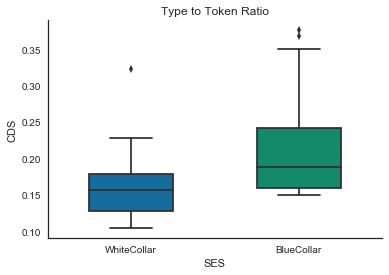

In [16]:
# make boxplot with Seaborn
sns.set_style('white')

p = sns.boxplot(y = 'CDS', x = 'SES',
                data = df,
                width=0.5,
                palette="colorblind")

p.set_title("Type to Token Ratio")
sns.despine()